Problem Statement

The dataset contains the temperature, humidity, pressure, and so on recorded from different rooms. The data is collected from the sensors that are implanted in different houses. The house temperature and humidity were monitored using a wireless sensor network. Our aim is to predict the energy used by the appliances in Wh.

**About the dataset (Appliances Energy Prediction data)**

Appliances: Energy use in Wh (Target Variable)
lights: Energy use of light fixtures in the house in Wh

1. T1: Temperature in the kitchen area in Celsius
2. RH_1: Humidity in the kitchen area in %
3. T2: Temperature in the living room area in Celsius
4. RH_2: Humidity in the living room area in %
5. T3: Temperature in the laundry room area
6. RH_3: Humidity in the laundry room area in %
7. T4: Temperature in the office room in Celsius
8. RH_4: Humidity in the office room in %
9. T5: Temperature in the bathroom in Celsius
10. RH_5: Humidity in the bathroom in %
11. T6: Temperature outside the building (north side) in Celsius
12. RH_6: Humidity outside the building (north side) in %
13. T7: Temperature in ironing room in Celsius
14. RH_7: Humidity in ironing room in %
15. T8: Temperature in teenager room 2 in Celsius
16. RH_8: Humidity in teenager room 2 in %
17. T9: Temperature in parents room in Celsius
18. RH_9: Humidity in parents room in %
19. T_out: Temperature outside the building in Celsius
20. Pres_mm_hg: Pressure in mm Hg
21. RH_out: Humidity outside the building in %
22. Windspeed: Speed of the wind in m/s
23. Visibility: Visibility of the building from the nearest weather station in km

In [1]:
# pip install numpy==1.20.3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15,6]
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

import os
os.getcwd()
os.chdir('F:\Rakesh\PGP-BABI\Python Programming')
os.getcwd()

In [3]:
df_energy=pd.read_csv("energy_data.csv")
df_energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.950000,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.700000,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.290000,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.790000,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.790000,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


# Objective

1. Understand some intricacies of EDA. How to deal with Clumsy and large number of columns in the dataset.
2. Transformation
3. Encoding
4. Feature Selection - focus on Forward and Backward Selection.
5. Recursive Feature Selection.
6. Cross Validation.
7. Bias and Variance Concepts
8. Regularization.
9. Grid Search CV

### Check the attributes of the Dataset

In [4]:
df_energy.shape

(1000, 25)

In [5]:
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,94.580000,3.880000,21.689083,40.220658,20.308276,40.456847,22.291003,39.193848,20.877548,38.883203,...,35.202685,22.110523,42.876733,19.500280,41.421305,7.270235,755.522126,79.722845,4.057964,38.219167
std,95.963705,8.075321,1.533835,3.966141,2.123854,4.080899,1.939537,3.171917,1.947205,4.297529,...,5.069127,1.877895,5.208331,1.926965,4.132533,5.207305,7.433976,14.623087,2.454295,11.679127
min,20.000000,0.000000,16.823333,28.193333,16.200000,24.823333,17.290000,33.200000,15.160000,29.421429,...,23.290000,16.583333,29.600000,15.000000,29.426667,-4.955556,730.700000,24.500000,0.000000,3.333333
25%,50.000000,0.000000,20.790000,37.200000,18.790000,38.057500,20.823333,36.900000,19.566667,35.484167,...,31.352738,20.910625,39.200000,18.100000,38.421429,3.537500,750.800000,70.000000,2.000000,28.666667
50%,60.000000,0.000000,21.600000,39.700000,19.890000,40.400000,22.100000,38.500000,20.760000,38.290000,...,34.609111,22.200000,42.352333,19.500000,40.566667,6.841667,755.941667,83.833333,3.666667,40.000000
75%,100.000000,0.000000,22.533333,42.861667,21.390000,43.200000,23.390000,41.500000,22.100000,41.992500,...,39.000000,23.441857,46.430694,20.600000,44.308333,10.433333,760.937500,91.333333,5.666667,40.000000
max,800.000000,40.000000,26.066667,54.800000,29.100000,53.249880,28.867143,49.930000,26.100000,50.963333,...,49.444444,27.100000,56.598333,24.434000,52.700000,25.600000,772.200000,100.000000,13.000000,65.000000


In [6]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   1000 non-null   int64  
 1   lights       1000 non-null   int64  
 2   T1           1000 non-null   float64
 3   RH_1         1000 non-null   float64
 4   T2           1000 non-null   float64
 5   RH_2         1000 non-null   float64
 6   T3           1000 non-null   float64
 7   RH_3         1000 non-null   float64
 8   T4           1000 non-null   float64
 9   RH_4         1000 non-null   float64
 10  T5           1000 non-null   float64
 11  RH_5         1000 non-null   float64
 12  T6           1000 non-null   float64
 13  RH_6         1000 non-null   float64
 14  T7           1000 non-null   float64
 15  RH_7         1000 non-null   float64
 16  T8           1000 non-null   float64
 17  RH_8         1000 non-null   float64
 18  T9           1000 non-null   float64
 19  RH_9   

In [7]:
# to know the percent of missing values
(df_energy.isnull().sum() /df_energy.index.size) *100

Appliances    0.000000
lights        0.000000
T1            0.000000
RH_1          0.000000
T2            0.000000
RH_2          0.000000
T3            0.000000
RH_3          0.000000
T4            0.000000
RH_4          0.000000
T5            0.000000
RH_5          0.000000
T6            0.000000
RH_6          0.000000
T7            0.000000
RH_7          0.000000
T8            0.000000
RH_8          0.000000
T9            0.000000
RH_9          0.000000
T_out         0.000000
Press_mm_hg   0.000000
RH_out        0.000000
Windspeed     0.000000
Visibility    0.000000
dtype: float64

### Prodecure for solving the problem

1. Univariate Analysis.
2. Outlier Treatment.
3. Missing Value Treatment.
4. Univariate.
5. Bivariate.
6. Multivariate.
7. Feature Engineering.
8. Scaling and Transformation.

### Modeling

1. Split the Data into Train and Test.
2. Build the Model- Linear Regression.
3. Evaluate the performance - r2 , RMSE.
4. Underfitting vs Overfitting (Bias vs Variance).
5. Assumption of the Model.
7. Cross validation Approach and Feature Selection.
6. If Assumptions fail - then apply Decision Tree, Random Forest, Bagging, Boosting models are build.

**Remove Any Insignificant Variables**

**At the outset we do not have any insignificant variables**

### Numerical and Categorical variables

In [8]:
cols=list(df_energy.select_dtypes(include=np.number).columns)
cols

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility']

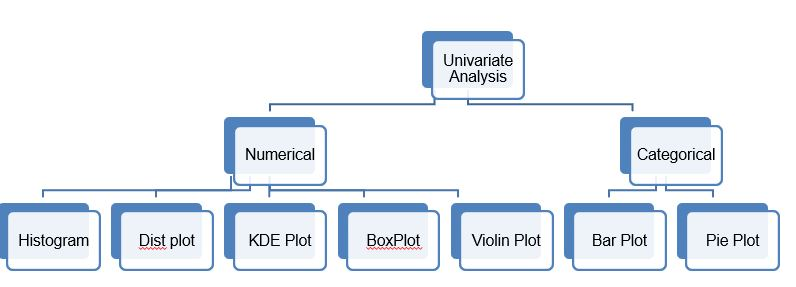

In [9]:
from IPython.display import Image
Image(filename='Univariate.JPG',width=600,height=200)

**Univariate Analysis**

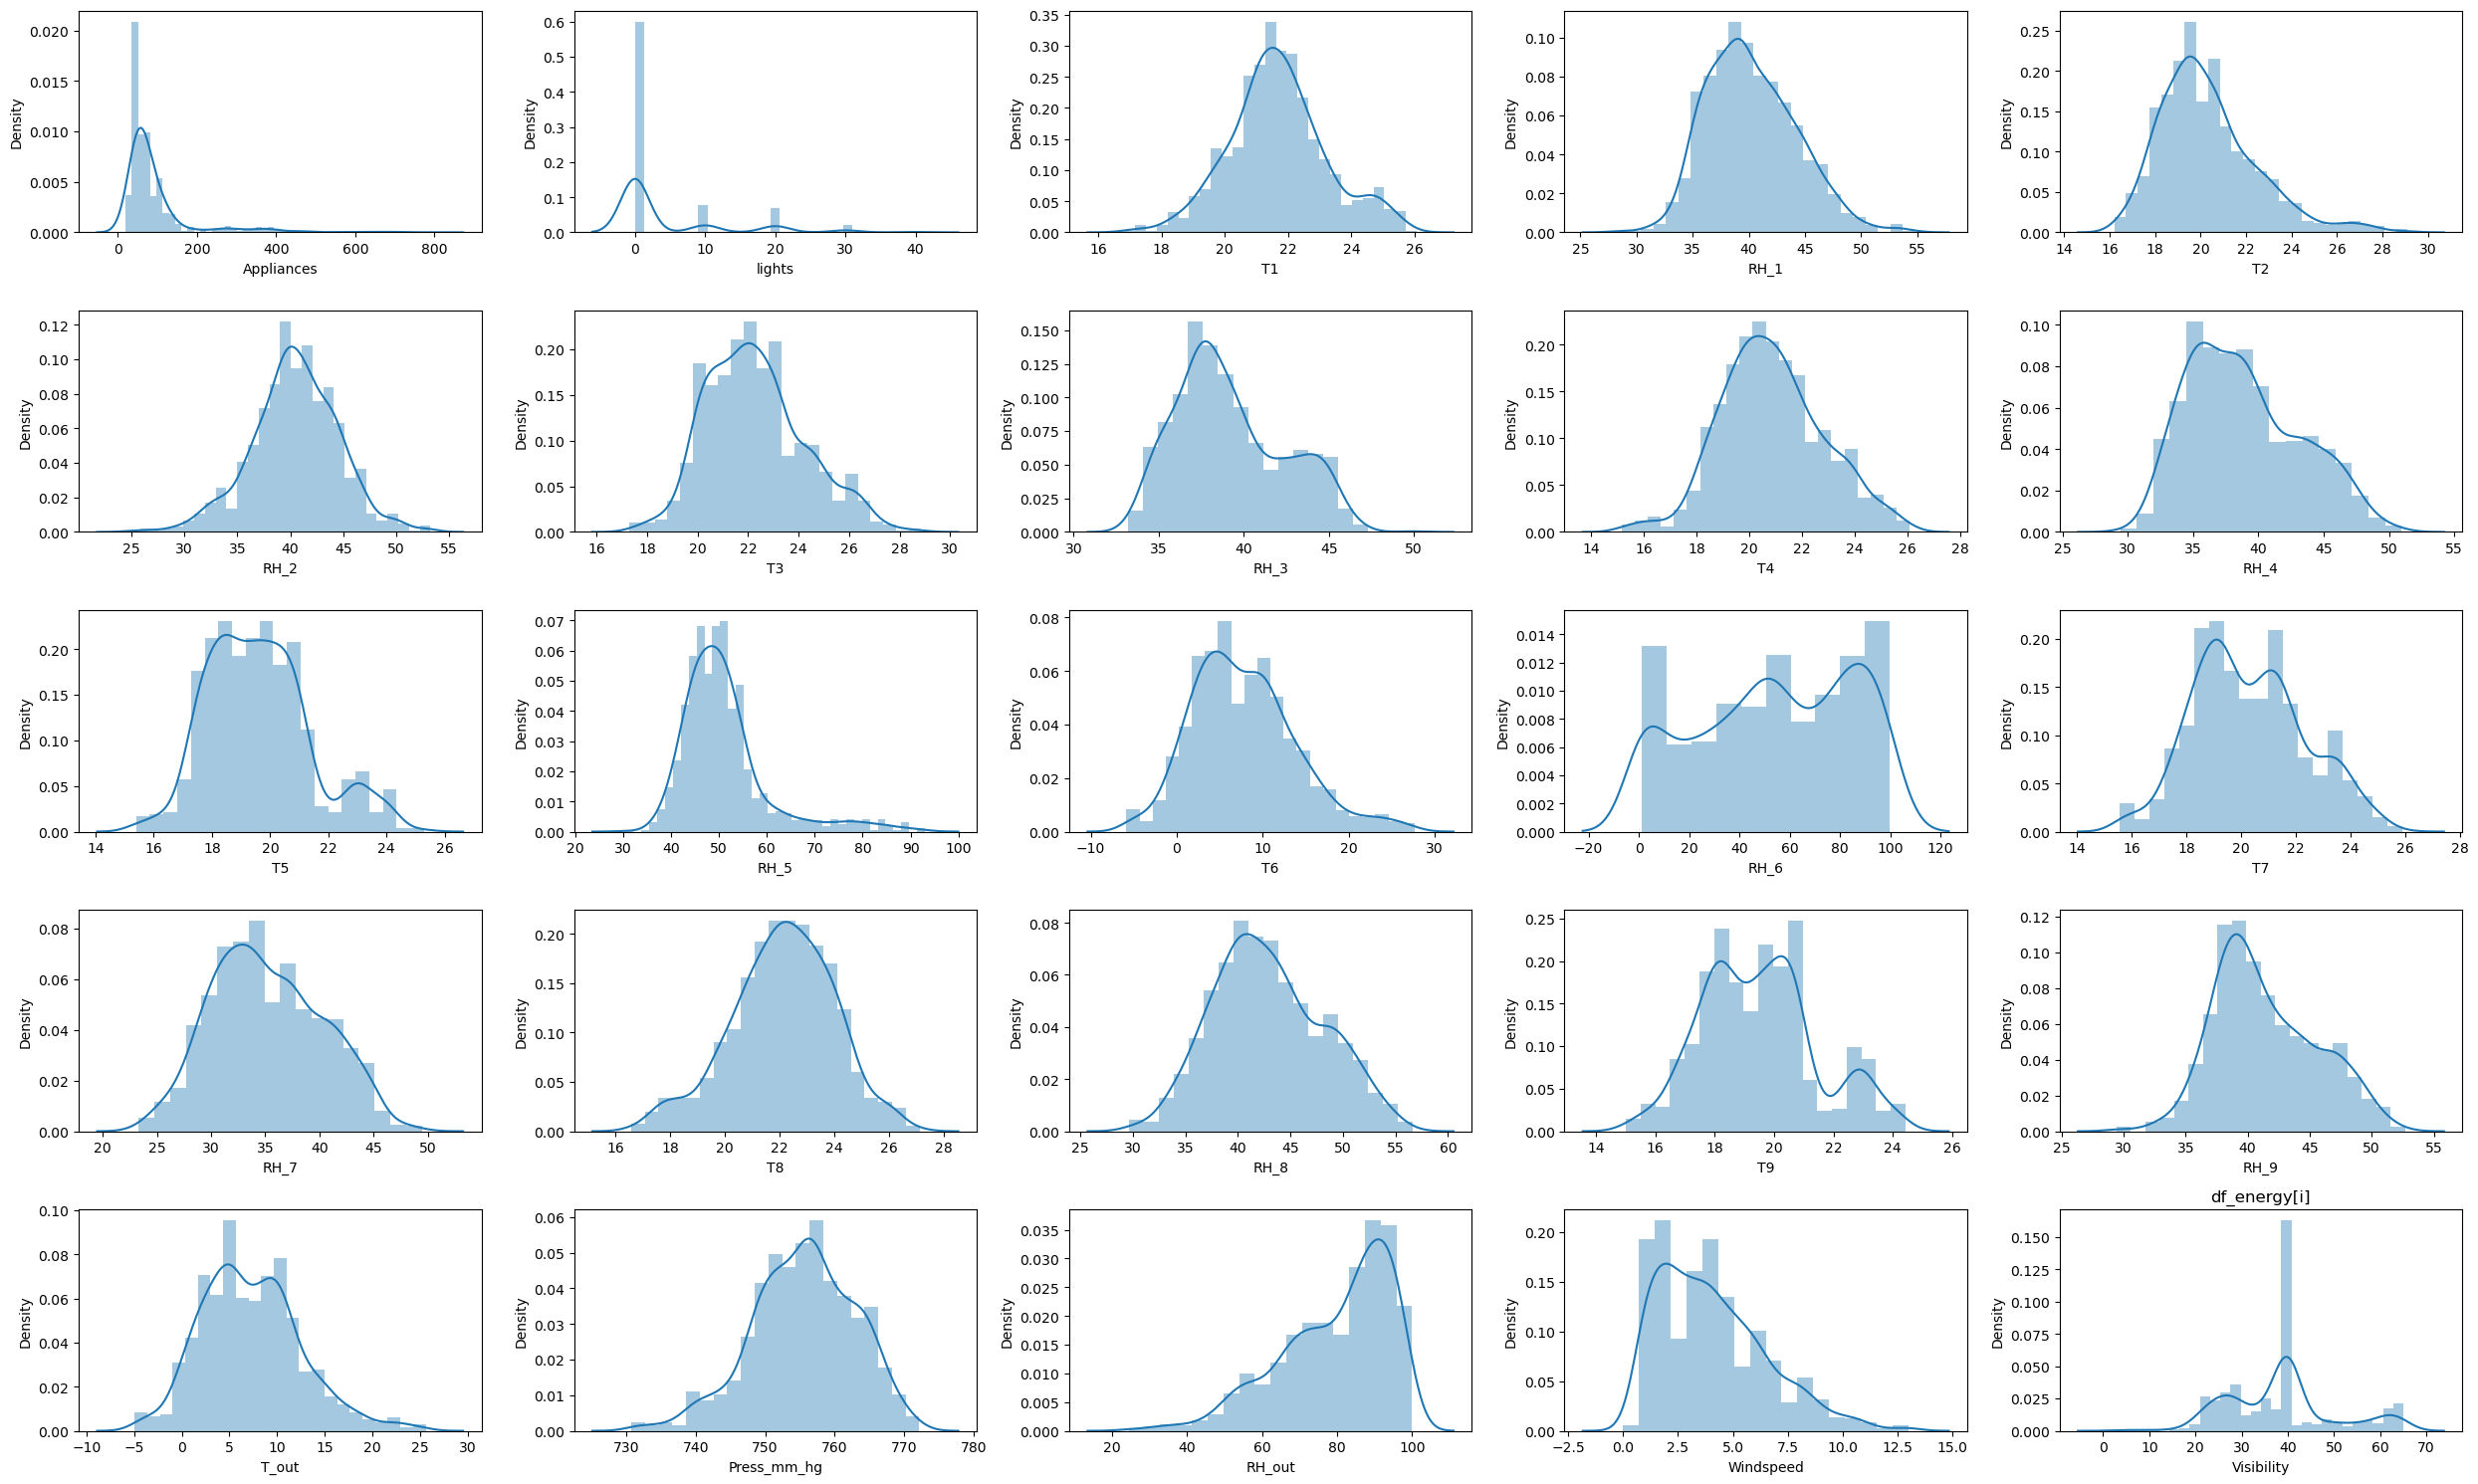

In [10]:
fig, ax= plt.subplots(5,5, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.distplot(df_energy[i], ax=subplot,kde=True)
    plt.title('df_energy[i]')

plt.tight_layout()
plt.show()

1. Light and Appliances are discrete variable.
2. All other variables are continuous.

In [11]:
df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,94.580000,3.880000,21.689083,40.220658,20.308276,40.456847,22.291003,39.193848,20.877548,38.883203,...,35.202685,22.110523,42.876733,19.500280,41.421305,7.270235,755.522126,79.722845,4.057964,38.219167
std,95.963705,8.075321,1.533835,3.966141,2.123854,4.080899,1.939537,3.171917,1.947205,4.297529,...,5.069127,1.877895,5.208331,1.926965,4.132533,5.207305,7.433976,14.623087,2.454295,11.679127
min,20.000000,0.000000,16.823333,28.193333,16.200000,24.823333,17.290000,33.200000,15.160000,29.421429,...,23.290000,16.583333,29.600000,15.000000,29.426667,-4.955556,730.700000,24.500000,0.000000,3.333333
25%,50.000000,0.000000,20.790000,37.200000,18.790000,38.057500,20.823333,36.900000,19.566667,35.484167,...,31.352738,20.910625,39.200000,18.100000,38.421429,3.537500,750.800000,70.000000,2.000000,28.666667
50%,60.000000,0.000000,21.600000,39.700000,19.890000,40.400000,22.100000,38.500000,20.760000,38.290000,...,34.609111,22.200000,42.352333,19.500000,40.566667,6.841667,755.941667,83.833333,3.666667,40.000000
75%,100.000000,0.000000,22.533333,42.861667,21.390000,43.200000,23.390000,41.500000,22.100000,41.992500,...,39.000000,23.441857,46.430694,20.600000,44.308333,10.433333,760.937500,91.333333,5.666667,40.000000
max,800.000000,40.000000,26.066667,54.800000,29.100000,53.249880,28.867143,49.930000,26.100000,50.963333,...,49.444444,27.100000,56.598333,24.434000,52.700000,25.600000,772.200000,100.000000,13.000000,65.000000


**Boxplots**

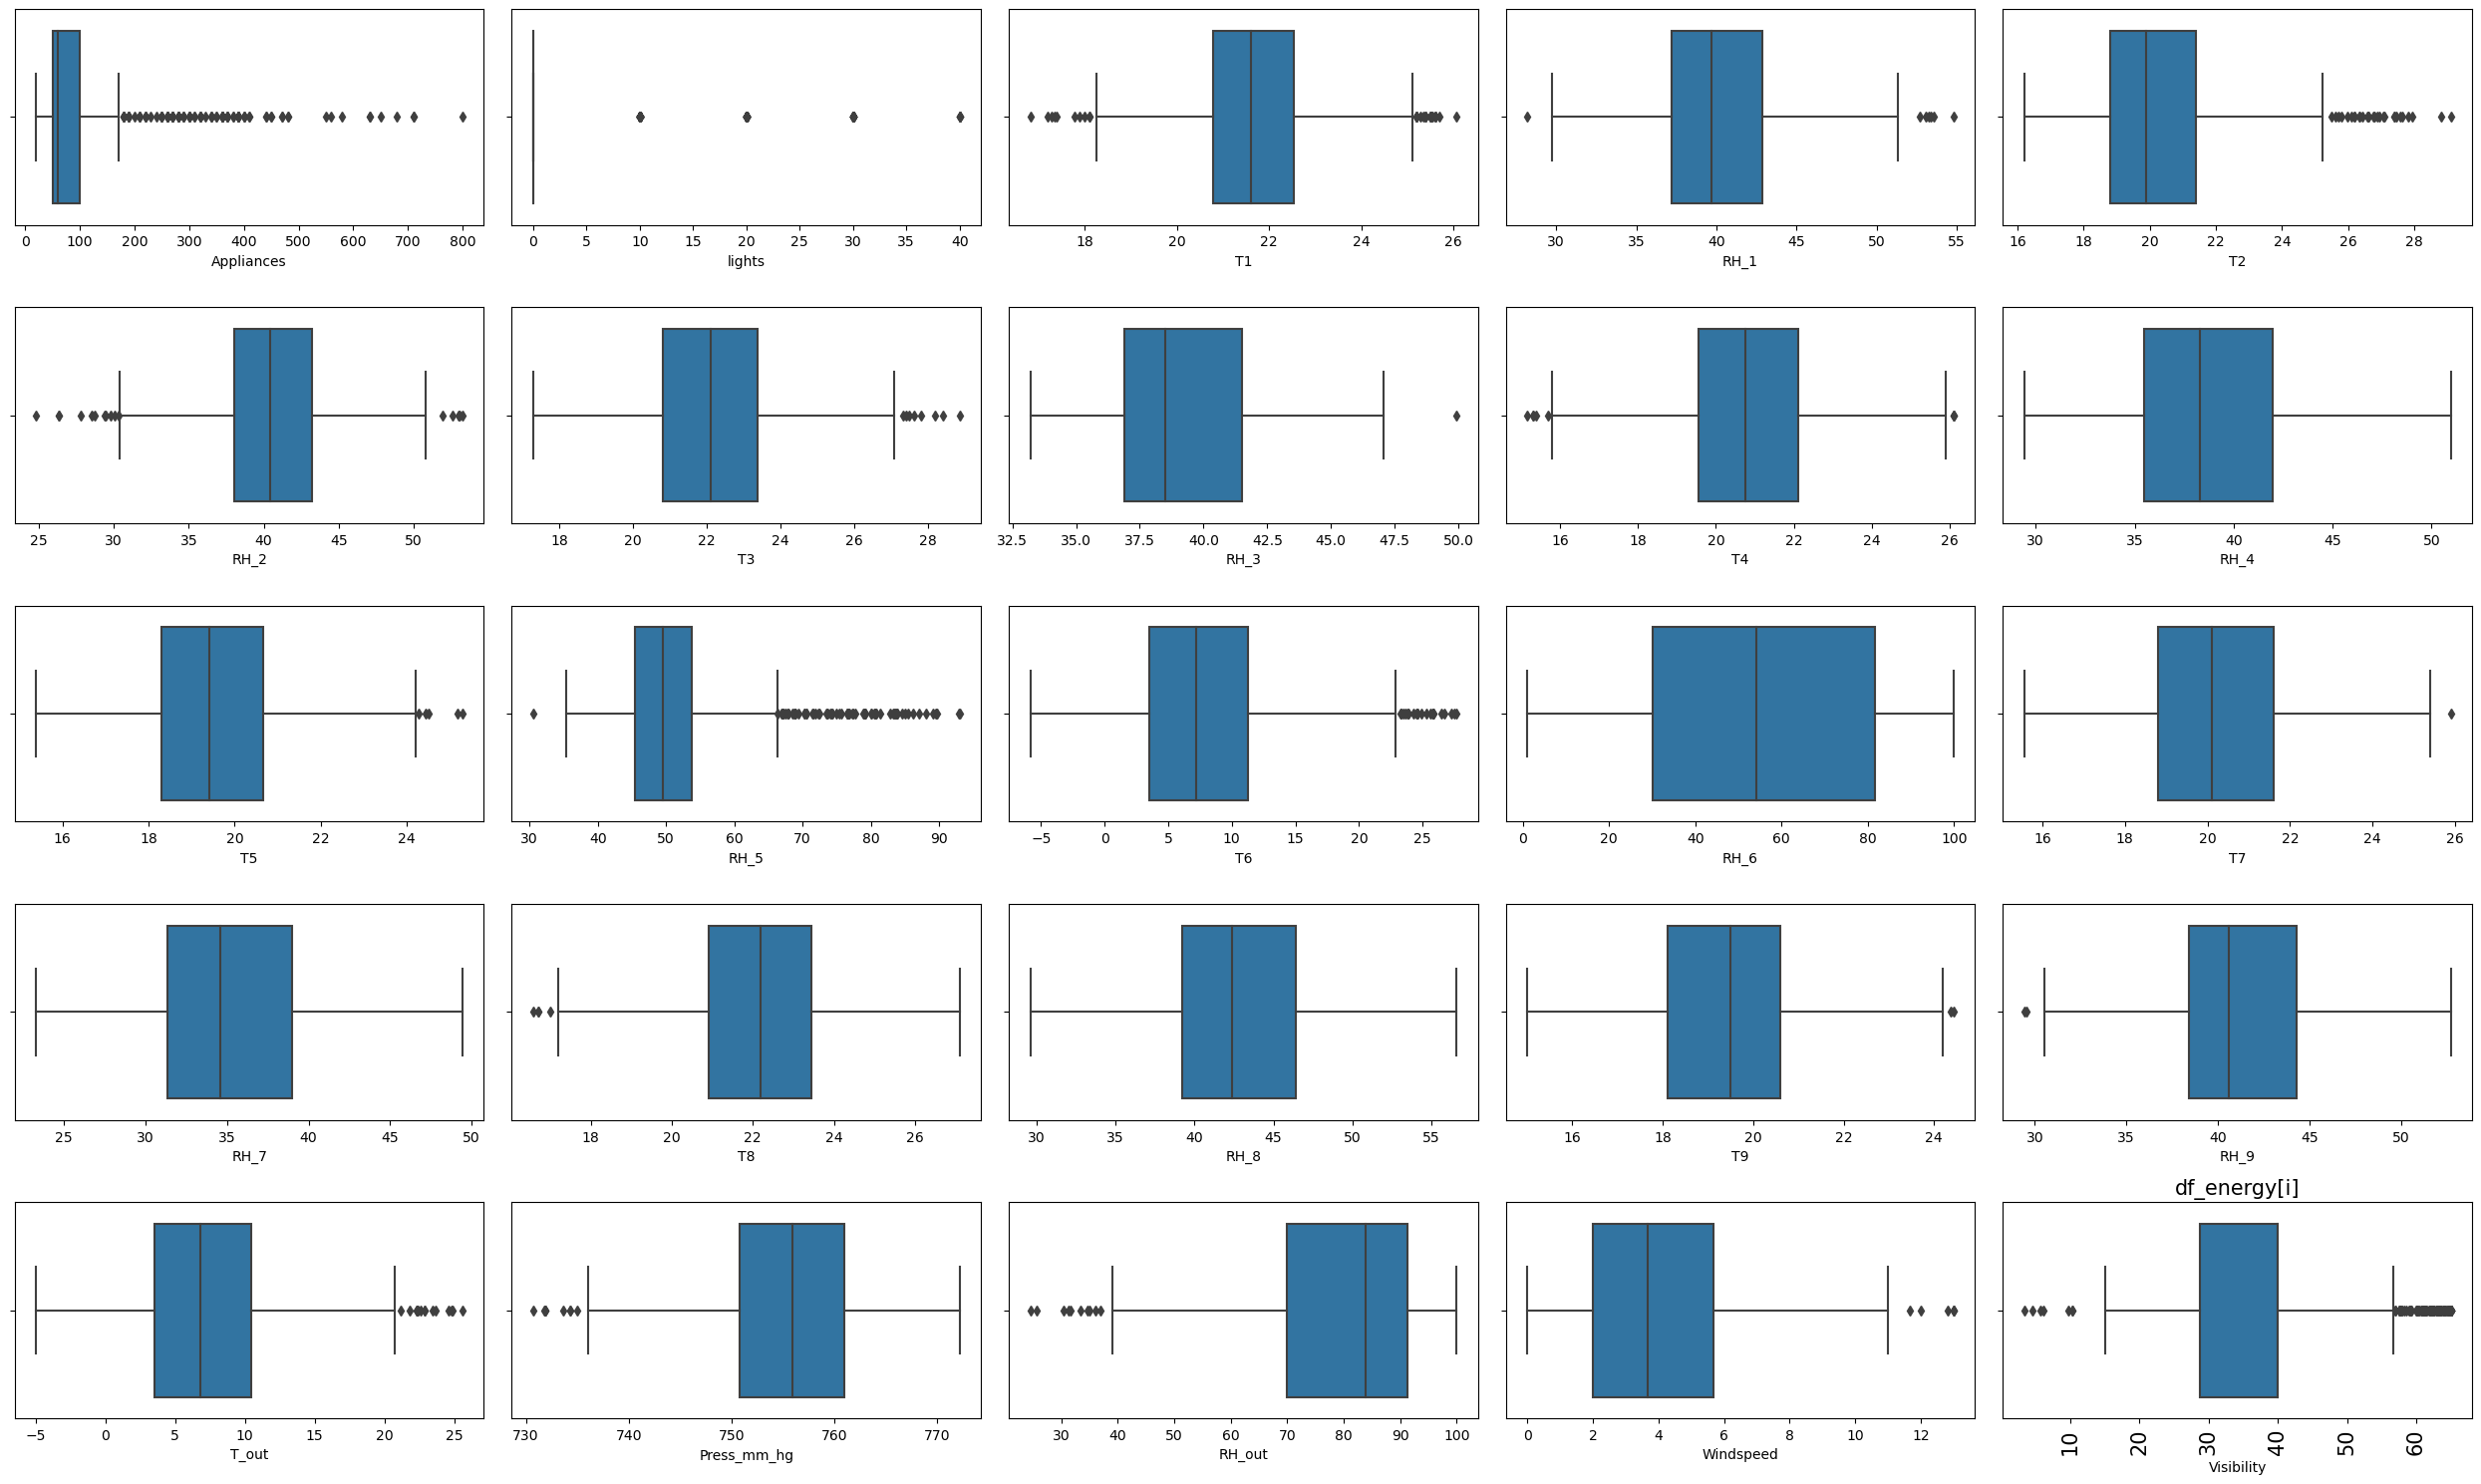

In [12]:
fig, ax= plt.subplots(5,5, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_energy[i], ax=subplot)
    plt.title('df_energy[i]', fontsize=15)
    plt.xticks(rotation = 'vertical', fontsize = 15)

plt.tight_layout()
plt.show()

Do not follow this coding style for boxplot

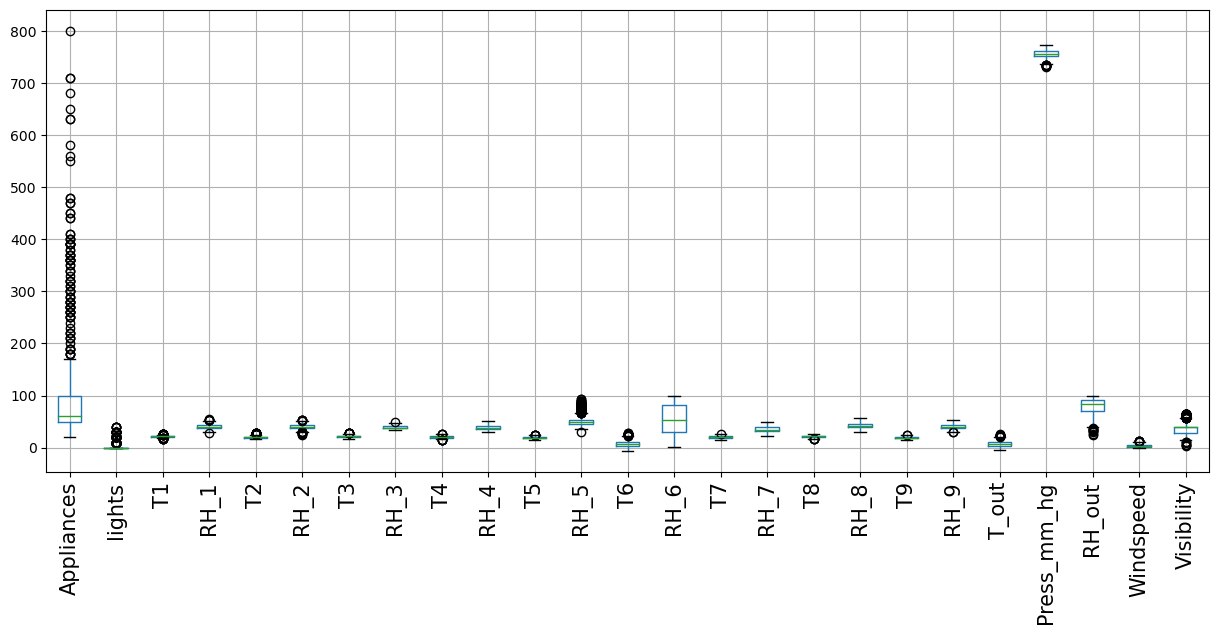

In [13]:
df_energy.boxplot()

plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Bivariate Analysis**

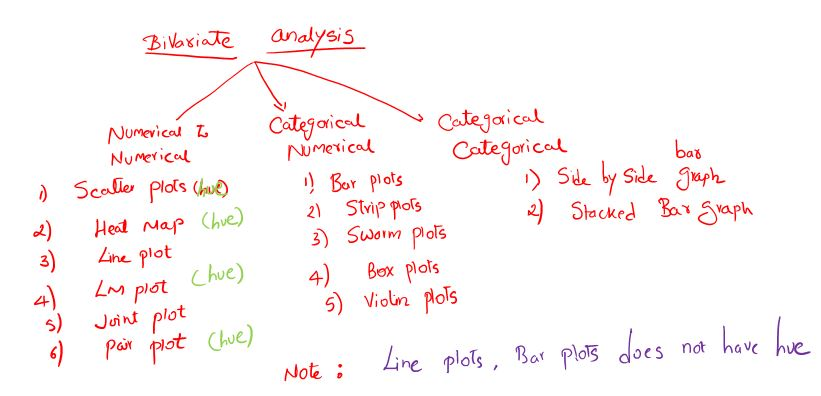

In [14]:
from IPython.display import Image
Image(filename='Bivariate.JPG',width=600,height=300)

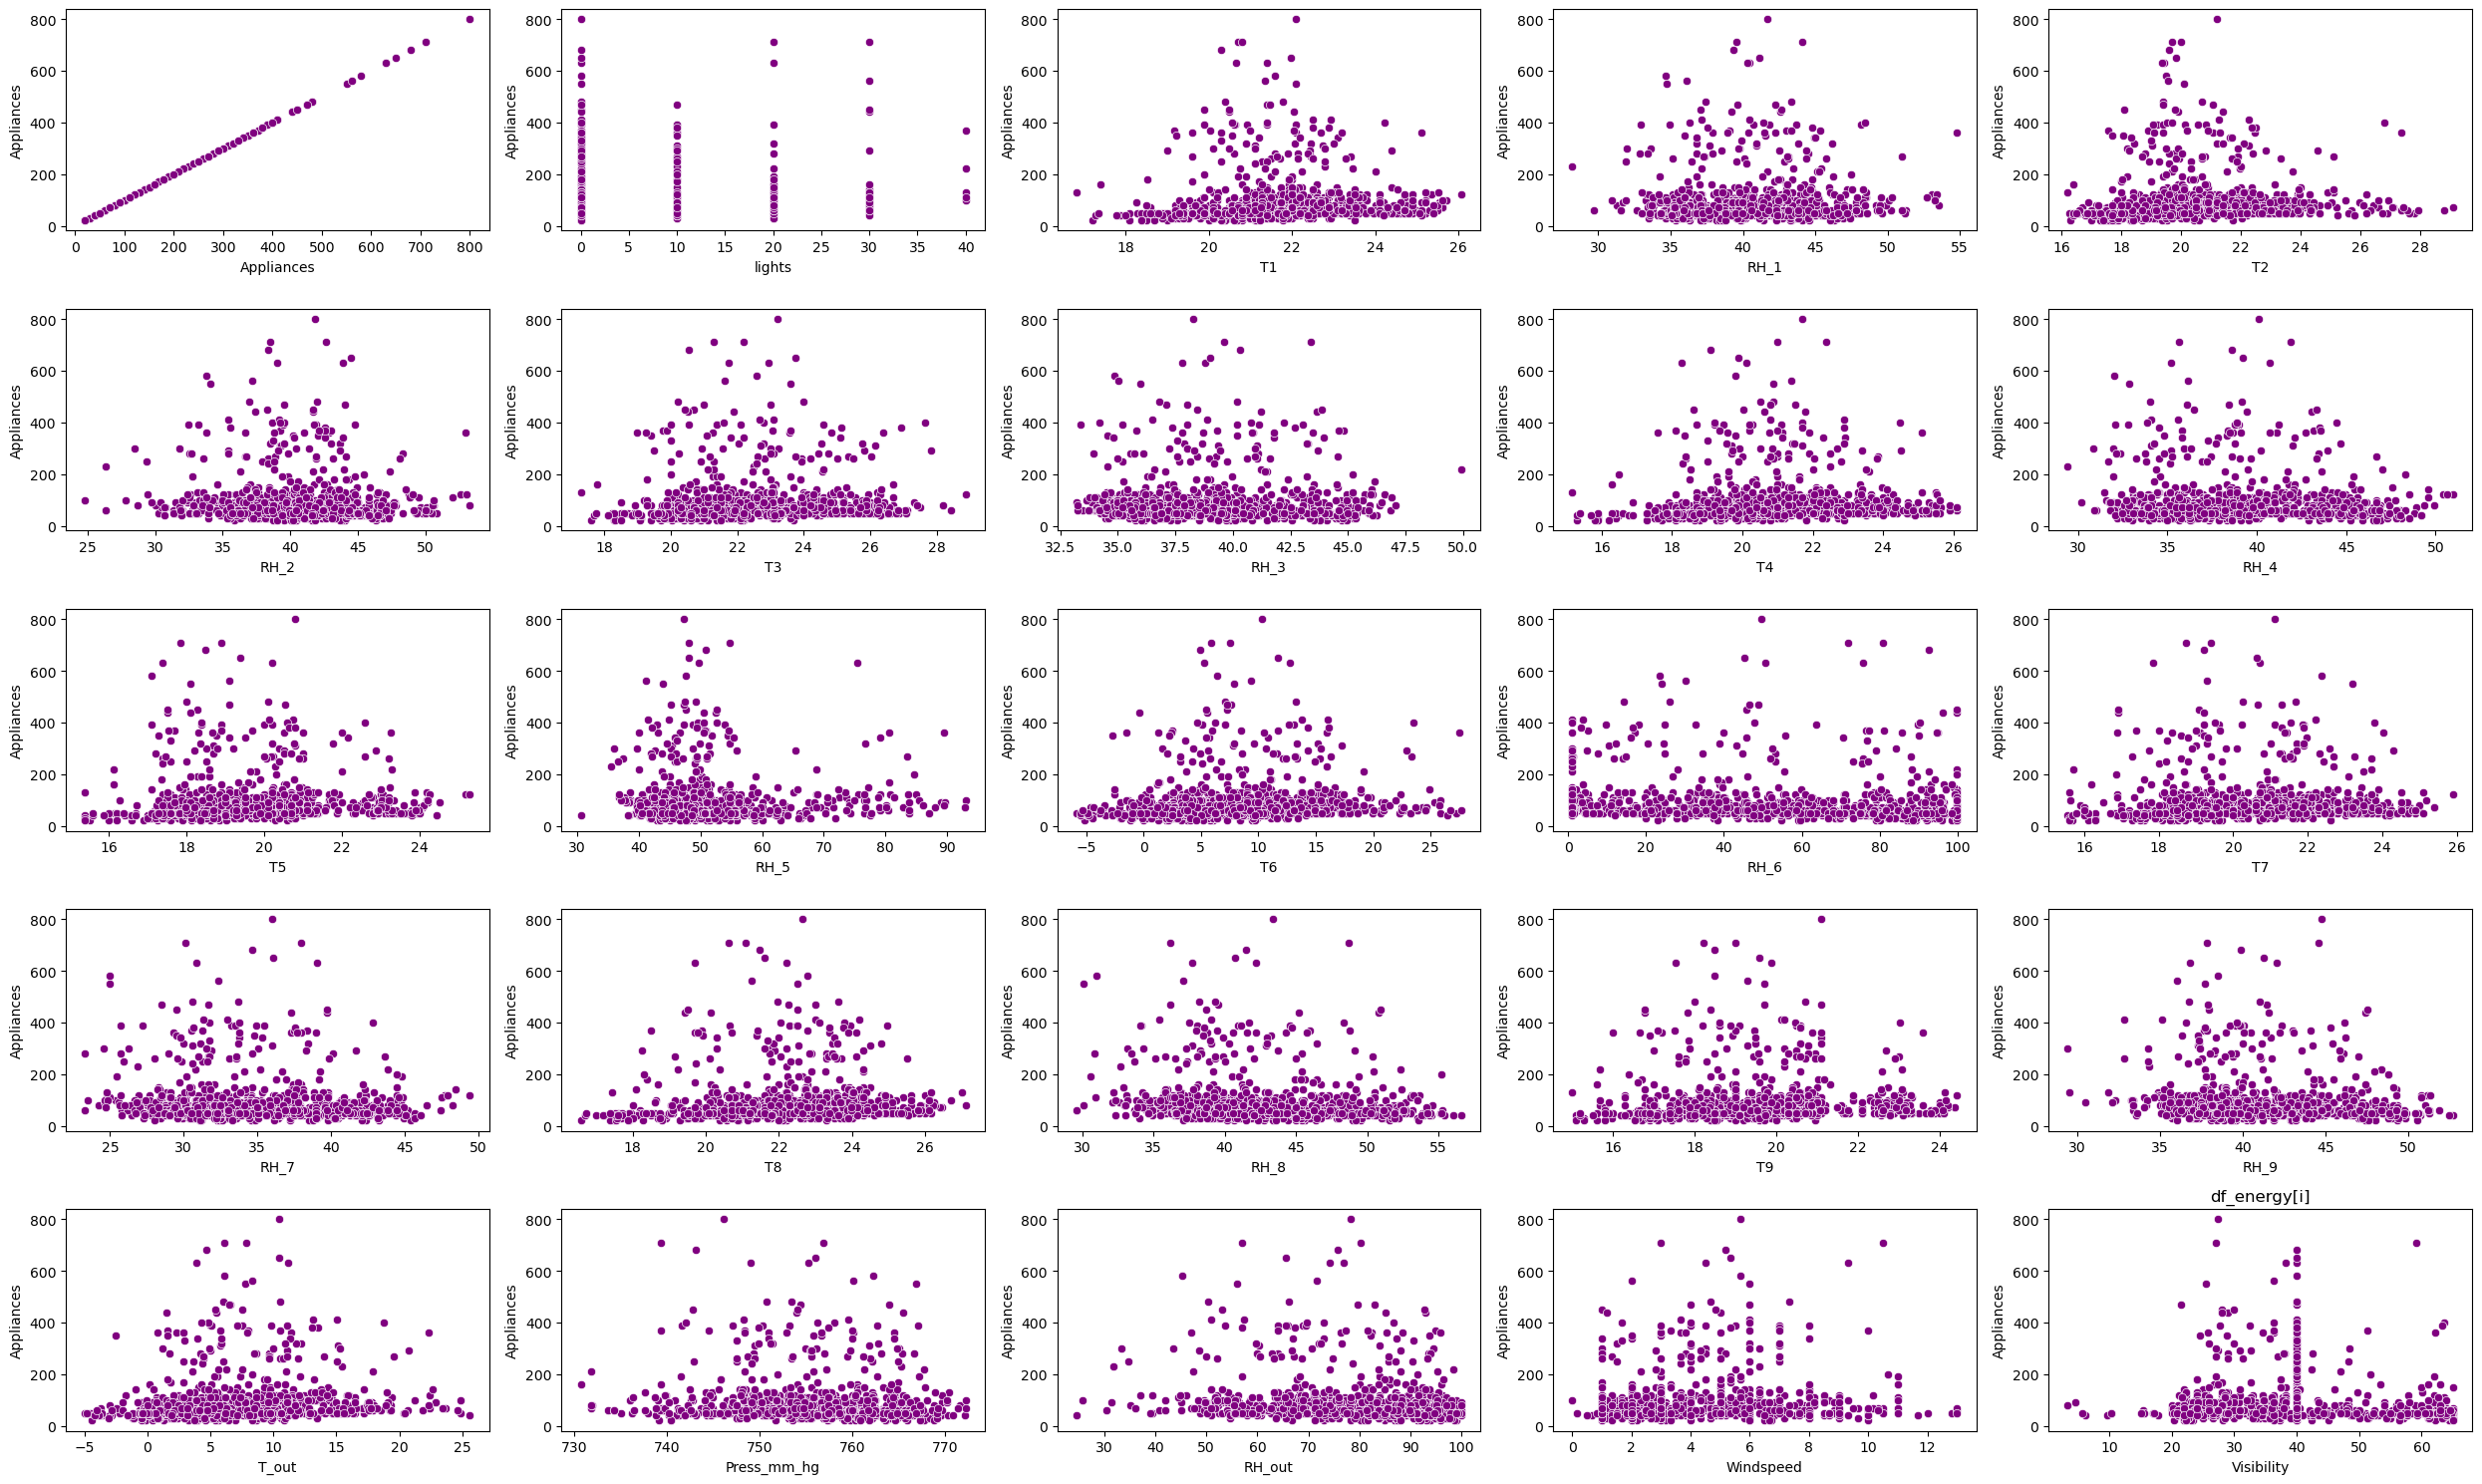

In [15]:
fig, ax= plt.subplots(5,5, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df_energy[i],y=df_energy['Appliances'], ax=subplot,color='purple')
    plt.title('df_energy[i]')

plt.tight_layout()
plt.show()

**Lets check the correlation between Independent variable**

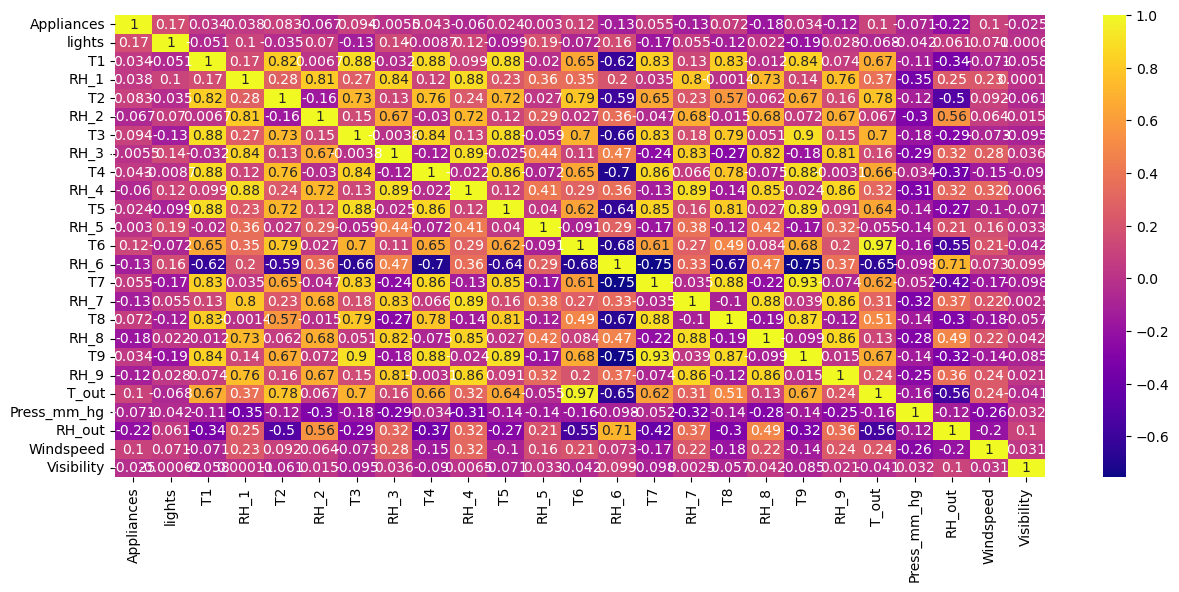

In [16]:
sns.heatmap(df_energy.corr(),annot=True,cmap="plasma")
plt.show()

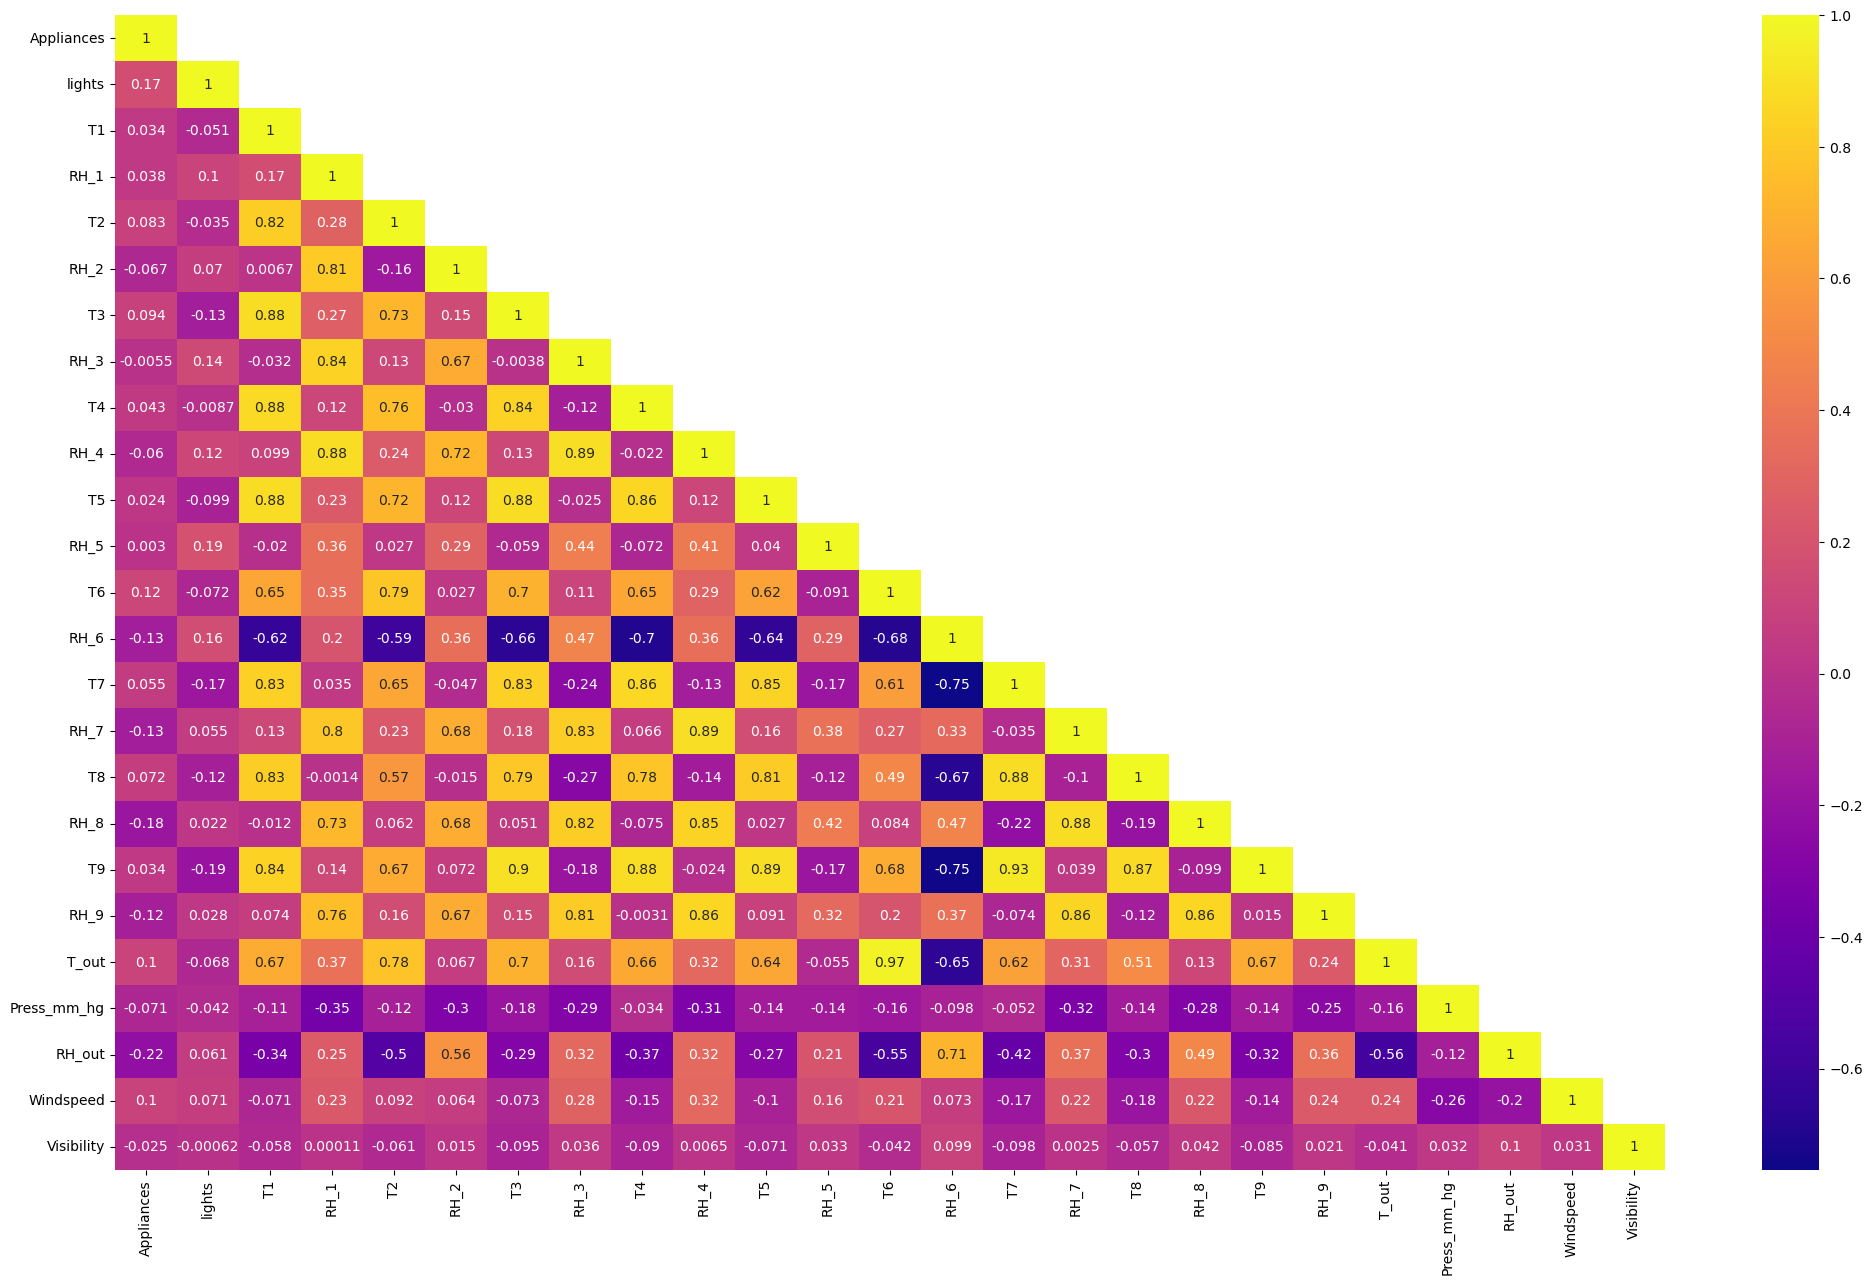

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(df_energy.corr(),annot=True,cmap='plasma',mask=np.triu(df_energy.corr(),+1))
plt.show()

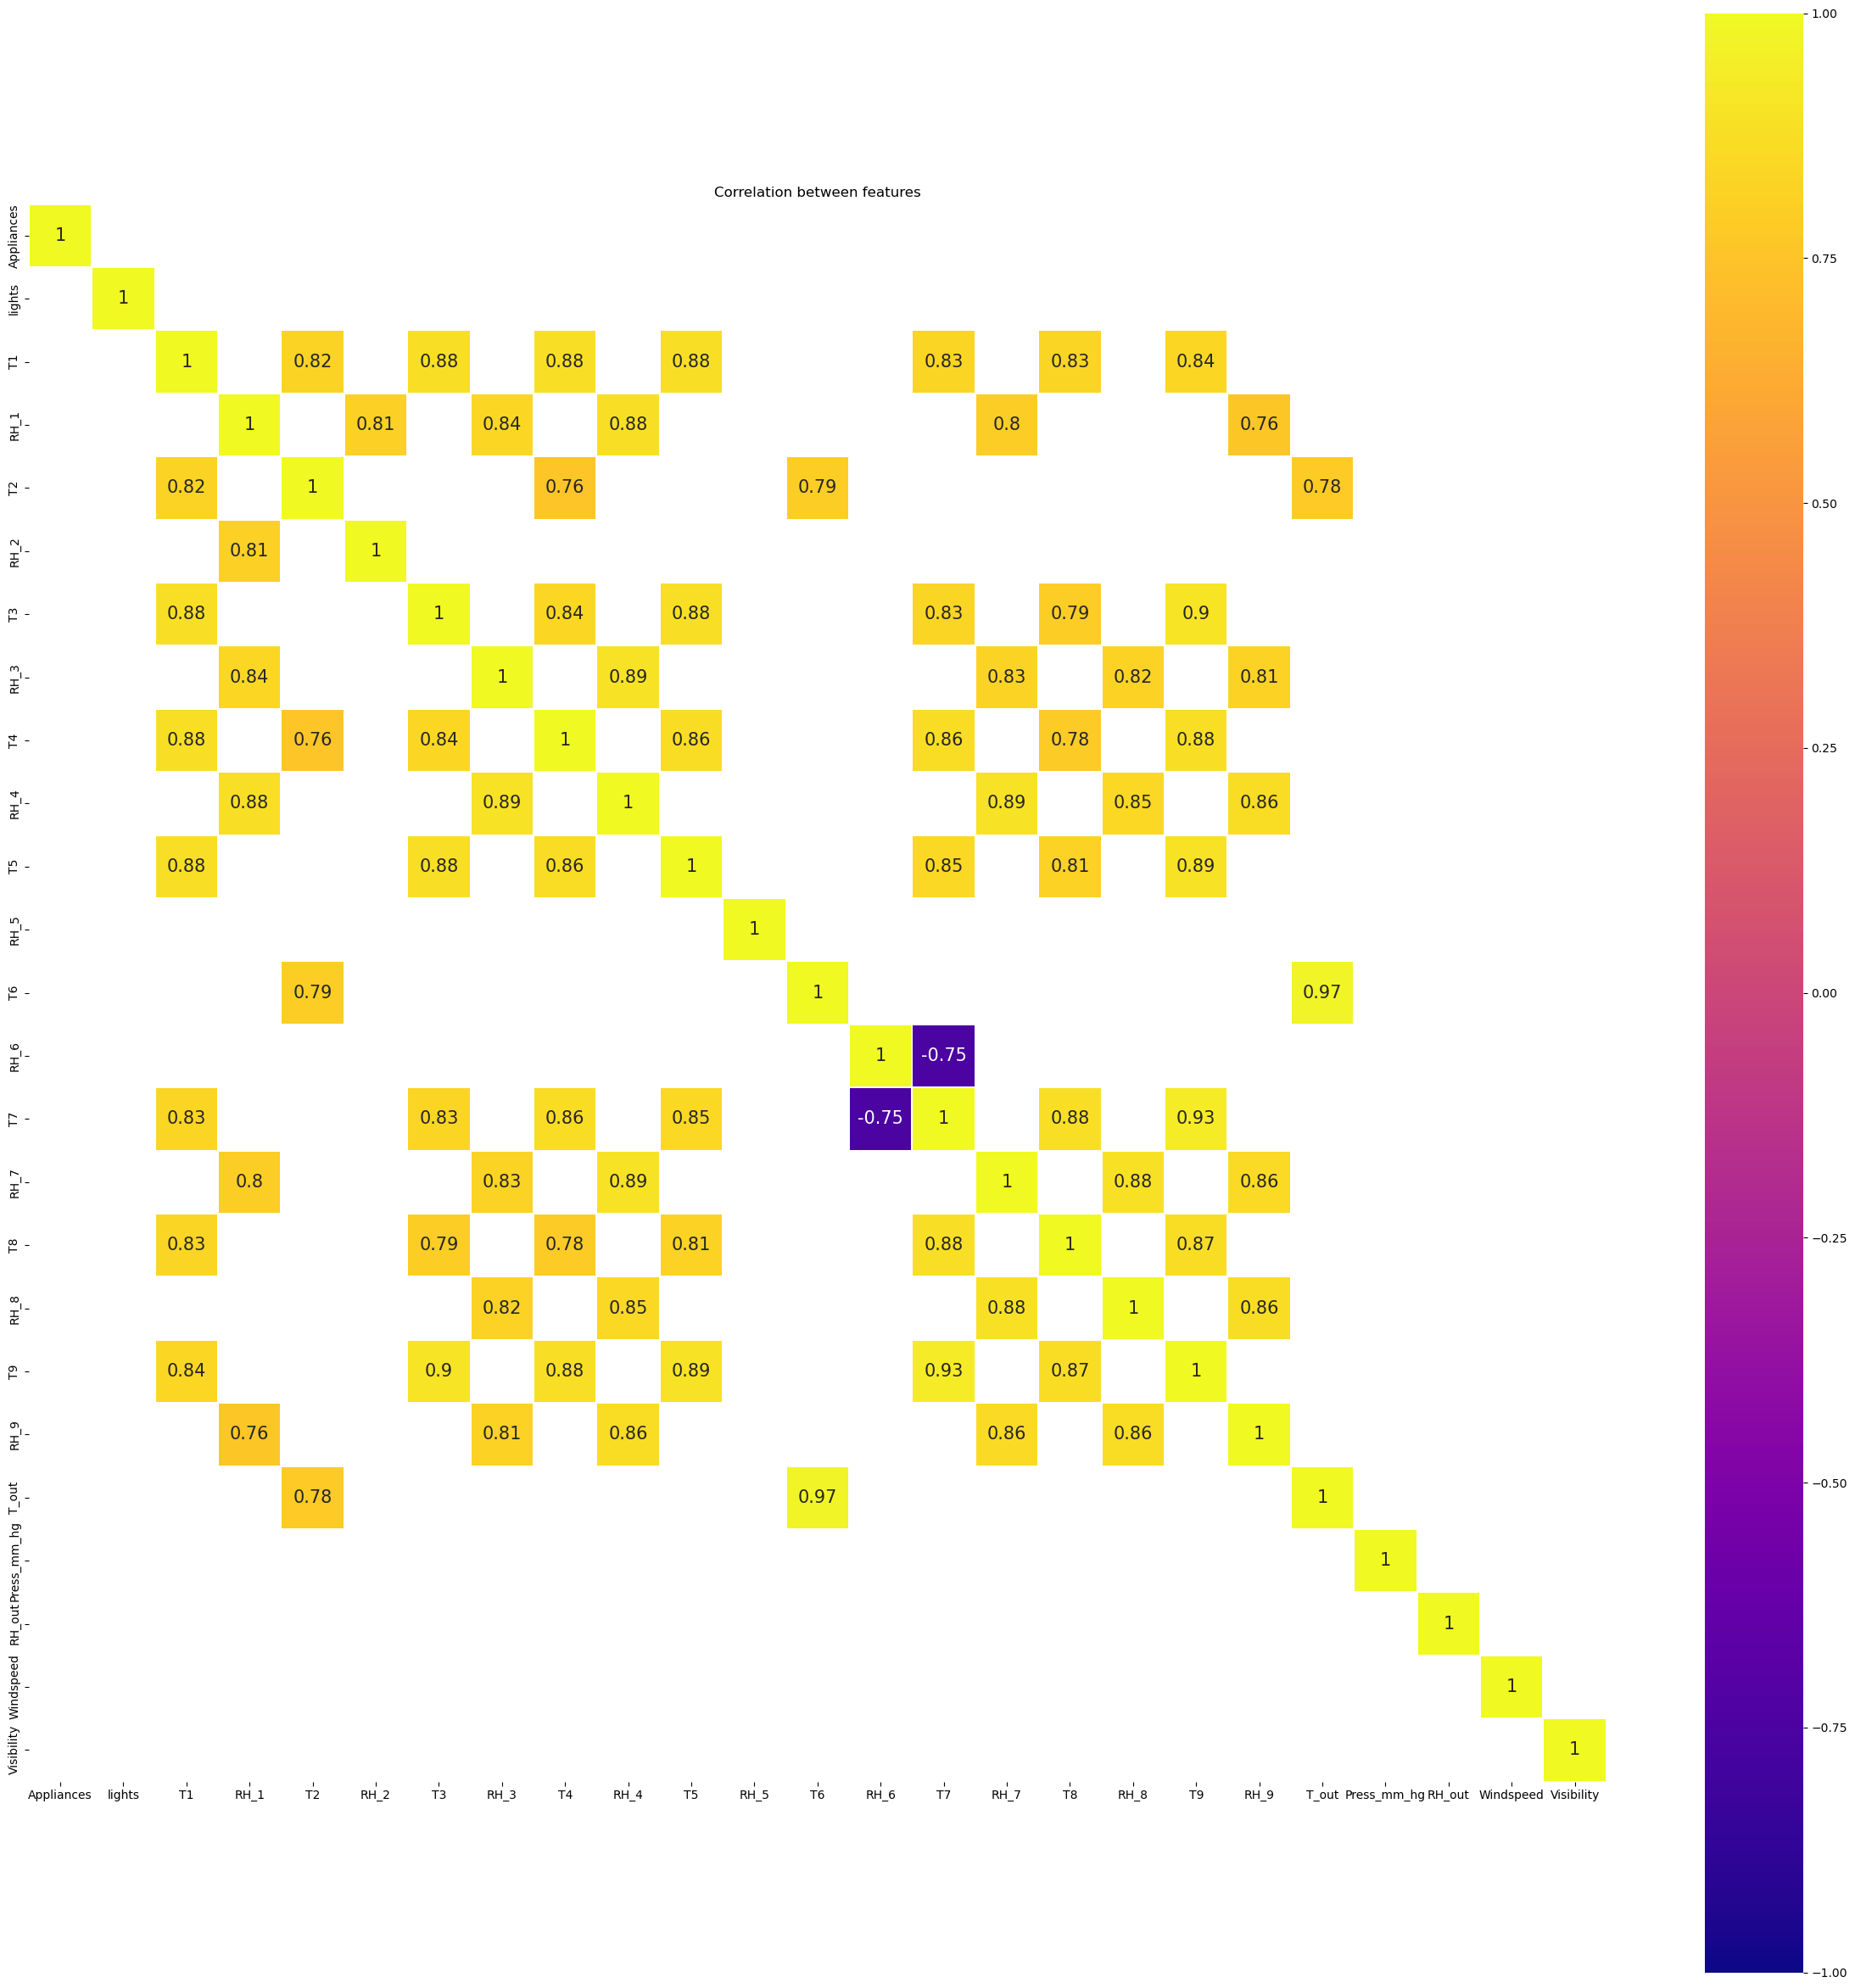

In [18]:
plt.figure(figsize=(30, 30))


sns.heatmap(df_energy.corr()[(df_energy.corr() >= 0.75) | (df_energy.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

### Remove the Outliers

1. iqr = q3-q1
2. Value > q3+1.5 * iqr
3. value < q1-1.5 * iqr

In [19]:
df_energy.shape

(1000, 25)

In [20]:
q1 =df_energy.quantile(0.25)
q3= df_energy.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [21]:
upper_limit

Appliances    175.000000
lights          0.000000
T1             25.148333
RH_1           51.354167
T2             25.290000
RH_2           50.913750
T3             27.240000
RH_3           48.400000
T4             25.900000
RH_4           51.755000
T5             24.231667
RH_5           66.387357
T6             22.966250
RH_6          159.090833
T7             25.815000
RH_7           50.470893
T8             27.238705
RH_8           57.276736
T9             24.350000
RH_9           53.138690
T_out          20.777083
Press_mm_hg   776.143750
RH_out        123.333333
Windspeed      11.166667
Visibility     57.000000
dtype: float64

1. '~' returns the values that do not satisfy the given conditions
i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
2. '|' is used as 'OR' operator on multiple conditions   
3. 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

In [22]:
#~(df_emp > upper_limit ) | (df_emp < lower_limit).any(axis=1)
df_energy = df_energy[~((df_energy < (lower_limit)) | (df_energy > (upper_limit))).any(axis=1)]
df_energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.700000,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.290000,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.790000,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
5,50,0,21.840000,42.745000,19.760000,45.430000,24.066667,39.723333,21.600000,40.218000,...,36.500000,22.873333,46.900000,21.000000,45.590000,8.800000,745.500000,89.333333,4.333333,24.333333
7,110,0,22.463333,39.260000,21.290000,39.530000,22.700000,37.700000,21.200000,38.626667,...,32.790000,24.033333,38.360000,20.323333,38.000000,9.216667,753.366667,71.333333,3.666667,40.000000


In [23]:
df_energy.shape

(543, 25)

In [24]:
# def cap_outlier(val):
#     Q1, Q3 = np.quantile(val, [.25, .75])
#     IQR = Q3 - Q1
#     LL = Q1 - 1.5*IQR
#     UL = Q3 + 1.5*IQR
#     return LL, UL

In [25]:
# for i in cols:
#     LL, UL = cap_outlier(df_emp[i])
#     df_emp[i] = np.where(df_emp[i]> UL, UL, df_emp[i])
#     df_emp[i] = np.where(df_emp[i]< LL, LL, df_emp[i])

**Check for presence of Insignificant Variables from Model Perspective**

In [26]:
df_energy.std()

Appliances    25.658997
lights         0.000000
T1             1.418813
RH_1           3.579217
T2             1.821311
RH_2           3.803841
T3             1.784325
RH_3           2.978032
T4             1.810984
RH_4           4.079861
T5             1.666814
RH_5           5.473533
T6             5.325781
RH_6          29.376223
T7             1.898608
RH_7           4.663495
T8             1.832304
RH_8           4.976368
T9             1.813200
RH_9           3.973931
T_out          4.615927
Press_mm_hg    6.922218
RH_out        13.365639
Windspeed      2.279804
Visibility     8.582396
dtype: float64

1. Light has zero std which means there is no contribution from this variable. Good to remove this variable.

In [27]:
df_energy = df_energy.drop('lights',axis=1)

### Encoding Techniques

All the Variables are Numerical and hence we do not require any Encoding Technique

### Transformation of Variables

1. Square Root Transformation
2. Cube Root Transformation
3. Log Transformation
4. Box Cox Transformation
5. Yeo Johnson Transformation

### Modeling

1. Split the Train and Test Data
2. SKLearn Linear Regression
3. Check the RMSE and R2 square value of the model
4. Improvise the model
5. Get the Statistical Summary and calculate the values that are generated.
6. Check the Assumption of the data.
7. Feature Selection.
8. Cross Validation.

In [28]:
df_energy.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility'],
      dtype='object')

## Lets Build SKLearn Model First

In [29]:
#split the data x and y
X=df_energy.drop('Appliances',axis=1)
y=df_energy['Appliances']

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.20,random_state=1)

In [31]:
xtrain.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
406,21.700000,35.700000,20.365000,35.675000,21.100000,37.000000,21.000000,35.790000,18.000000,46.090000,...,30.825000,22.760000,39.100000,17.890000,36.430000,1.433333,764.966667,68.666667,1.666667,40.000000
156,21.600000,39.066667,18.790000,42.766667,22.390000,38.126667,20.500000,36.900000,20.100000,42.866667,...,37.966667,22.390000,43.790000,19.823333,41.933333,5.300000,755.900000,95.666667,2.000000,32.333333
518,22.323333,42.290000,21.600000,41.090000,23.033333,42.700000,20.865000,43.267500,20.516667,47.157222,...,37.663333,22.000000,49.255000,19.000000,45.090000,6.300000,744.700000,81.500000,8.500000,40.000000
409,21.890000,46.200000,21.000000,45.790000,23.200000,46.230000,20.100000,49.200000,19.715000,58.255000,...,45.911111,20.730000,56.598333,18.290000,52.700000,9.466667,758.250000,89.833333,6.000000,44.166667
298,25.000000,39.500000,22.575000,41.400000,25.290000,34.000000,25.100000,39.000000,23.890000,49.466667,...,36.290000,25.810000,42.980000,23.890000,45.090000,9.166667,753.716667,85.000000,4.000000,22.000000


In [32]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(108, 23)
(435, 23)
(108,)
(435,)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
lr=LinearRegression()

In [35]:
model_lr=lr.fit(xtrain,ytrain)

In [36]:
xtrain

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
406,21.700000,35.700000,20.365000,35.675000,21.100000,37.000000,21.000000,35.790000,18.000000,46.090000,...,30.825000,22.760000,39.100000,17.890000,36.430000,1.433333,764.966667,68.666667,1.666667,40.000000
156,21.600000,39.066667,18.790000,42.766667,22.390000,38.126667,20.500000,36.900000,20.100000,42.866667,...,37.966667,22.390000,43.790000,19.823333,41.933333,5.300000,755.900000,95.666667,2.000000,32.333333
518,22.323333,42.290000,21.600000,41.090000,23.033333,42.700000,20.865000,43.267500,20.516667,47.157222,...,37.663333,22.000000,49.255000,19.000000,45.090000,6.300000,744.700000,81.500000,8.500000,40.000000
409,21.890000,46.200000,21.000000,45.790000,23.200000,46.230000,20.100000,49.200000,19.715000,58.255000,...,45.911111,20.730000,56.598333,18.290000,52.700000,9.466667,758.250000,89.833333,6.000000,44.166667
298,25.000000,39.500000,22.575000,41.400000,25.290000,34.000000,25.100000,39.000000,23.890000,49.466667,...,36.290000,25.810000,42.980000,23.890000,45.090000,9.166667,753.716667,85.000000,4.000000,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,23.200000,38.000000,22.790000,36.117500,22.790000,38.090000,22.100000,36.975000,21.200000,42.356000,...,30.890000,23.500000,35.500000,20.856667,39.500000,14.800000,751.366667,55.333333,4.666667,40.000000
287,21.066667,46.163333,19.790000,46.433333,21.700000,43.000000,20.133333,45.626667,18.500000,53.356000,...,44.430000,20.390000,48.933333,18.700000,47.272000,6.800000,751.150000,97.500000,5.500000,51.500000
150,19.100000,39.900000,17.823333,40.360000,19.000000,39.663333,18.100000,37.200000,16.500000,55.510000,...,32.200000,19.463333,40.375556,16.890000,38.326667,1.066667,757.233333,60.666667,1.000000,25.333333
476,19.890000,45.500000,19.200000,45.030000,20.500000,44.400000,19.066667,46.760000,17.516667,52.900000,...,43.488889,18.133333,50.000000,17.133333,48.700000,10.500000,761.700000,82.000000,8.000000,27.000000


In [37]:

# this is done to check if the model is in overfit or underfit condition
pred_ytrain=model_lr.predict(xtrain) #  prediction on training data
pred_ytest=model_lr.predict(xtest)# prediction on testing data



In [38]:
r2_train=r2_score(ytrain,pred_ytrain)
r2_test=r2_score(ytest,pred_ytest)
r2_train,r2_test


(0.5123539731426294, 0.16291260158233667)

calculate the rmse values

In [39]:
print('rmse Train:',np.sqrt(mean_squared_error(ytrain,pred_ytrain)))
print('rmse test:',np.sqrt(mean_squared_error(ytest,pred_ytest)))

rmse Train: 17.779210204307674
rmse test: 23.486816120672014


In [40]:
#r2 is very low
#rmse value is very high

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf=RandomForestRegressor()
rf=rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)

In [43]:
print('rmse Train:',np.sqrt(mean_squared_error(ytrain,pred_train_rf)))
print('rmse test:',np.sqrt(mean_squared_error(ytest,pred_test_rf)))

rmse Train: 7.91265980471707
rmse test: 23.63178844876867


In [44]:
x=df_energy.drop('Appliances',axis=1)


In [45]:
import statsmodels.api as sna

In [46]:
temp_x=sna.add_constant(X)
x_train,x_test,y_train,y_test=train_test_split(temp_x,y,test_size=0.20,random_state=1)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(434, 24)
(109, 24)
(434,)
(109,)


In [48]:
model=sna.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.663
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.09e-26
Time:                        09:39:56   Log-Likelihood:                -1942.0
No. Observations:                 434   AIC:                             3932.
Df Residuals:                     410   BIC:                             4030.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.5038    157.184      0.194      0.846    -278.484     339.492
T1              1.6850      3.239      0.520      0.603      -4.683       8.053
RH_1            5.7350      1.404      4.084      0.000       2.974       8.496
T2             -7.0984      2.915     -2.435      0.015     -12.829      -1.368
RH_2           -4.4119      1.387     -3.181      0.002      -7.139      -1.685
T3              4.7152      1.865      2.528      0.012       1.049       8.382
RH_3            0.0217      1.275      0.017      0.986      -2.485       2.528
T4              3.2258      2.027      1.591      0.112      -0.759       7.210
RH_4            1.0482      1.182      0.887      0.376      -1.275       3.372
T5              0.2366      2.129      0.111      0.912      -3.949       4.422
RH_5           -0.0046      0.275     -0.017      0.987      -0.546       0.537
T6              1.4891      0.949      1.569      0.117      -0.377       3.355
RH_6            0.0480      0.107      0.447      0.655      -0.163       0.259
T7             -4.4128      2.288     -1.928      0.055      -8.911       0.086
RH_7            0.5859      0.676      0.867      0.387      -0.743       1.915
T8             11.1364      1.670      6.667      0.000       7.853      14.420
RH_8           -2.9775      0.588     -5.061      0.000      -4.134      -1.821
T9             -8.3401      3.044     -2.740      0.006     -14.324      -2.356
RH_9           -0.8892      0.663     -1.341      0.181      -2.192       0.414
T_out          -0.5231      1.100     -0.476      0.634      -2.685       1.638
Press_mm_hg     0.0053      0.191      0.028      0.978      -0.371       0.381
RH_out          0.0488      0.192      0.255      0.799      -0.328       0.426
Windspeed       1.1656      0.592      1.969      0.050       0.002       2.329
Visibility     -0.0091      0.129     -0.071      0.943      -0.262       0.244
==============================================================================
Omnibus:                      128.702   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.410
Skew:                           1.340   Prob(JB):                     9.37e-94
Kurtosis:                       7.063   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

linearity

In [49]:
sna.stats.linear_rainbow(model)

(0.624669245829712, 0.9996121718905507)

Normality test

In [50]:
stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=428.41026650507297, pvalue=0.0)

In [51]:
from scipy import stats

In [52]:
stats.boxcox(y_train)[0][0:3]

array([3.40643809, 3.91560106, 3.40643809])

In [53]:
model_box=sna.OLS(stats.boxcox(y_train)[0],x_train).fit()

In [54]:
print(model_box.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.630
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.36e-26
Time:                        09:39:56   Log-Likelihood:                 13.413
No. Observations:                 434   AIC:                             21.17
Df Residuals:                     410   BIC:                             118.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4724      1.737      2.000      

In [55]:
model_sqrt= sna.OLS(np.sqrt(y_train), x_train).fit() # squared root transformation
model_cbrt= sna.OLS(np.cbrt(y_train), x_train).fit() # cube root transformation
model_log= sna.OLS(np.log(y_train), x_train).fit() # log transformation
model_yojh= sna.OLS(stats.yeojohnson(y_train)[0], x_train).fit() # YeoJohnson transformation

In [56]:
transf_score = pd.DataFrame(columns=['Transformation',
                                     'R_Squared',
                                      'Adj Rsquared' ]
                                  )


def update_transformation (name,
                           model
                           ):

    # assign 'comp_perf' as global variable
    global transf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    transf_score = transf_score.append({'Transformation'    : name,
                                        'R_Squared'         : model.rsquared,
                                        'Adj Rsquared'    : model.rsquared_adj
                                    },
                                   ignore_index = True)

In [57]:
update_transformation(name='square root',model=model_sqrt)
transf_score

,Transformation,R_Squared,Adj Rsquared
0,square root,0.360127,0.324231


In [58]:
update_transformation(name='cube root',model=model_cbrt)
transf_score

,Transformation,R_Squared,Adj Rsquared
0,square root,0.360127,0.324231
1,cube root,0.359664,0.323743


In [59]:
update_transformation(name='Log',model=model_log)
transf_score

,Transformation,R_Squared,Adj Rsquared
0,square root,0.360127,0.324231
1,cube root,0.359664,0.323743
2,Log,0.353168,0.316883


In [60]:
update_transformation(name='YeoHohnson',model=model_yojh)
transf_score

,Transformation,R_Squared,Adj Rsquared
0,square root,0.360127,0.324231
1,cube root,0.359664,0.323743
2,Log,0.353168,0.316883
3,YeoHohnson,0.350877,0.314462


In [61]:
update_transformation(name='BoxCOx',model=model_box)
transf_score

,Transformation,R_Squared,Adj Rsquared
0,square root,0.360127,0.324231
1,cube root,0.359664,0.323743
2,Log,0.353168,0.316883
3,YeoHohnson,0.350877,0.314462
4,BoxCOx,0.350749,0.314328
